In [4]:
import pandas as pd

In [5]:
# Inserindo os arquivos em uma variavel para leitura
df1 = pd.read_excel('/content/drive/MyDrive/datasets/Aracaju.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/datasets/Fortaleza.xlsx')
df3 = pd.read_excel('/content/drive/MyDrive/datasets/Natal.xlsx')
df4 = pd.read_excel('/content/drive/MyDrive/datasets/Recife.xlsx')
df5 = pd.read_excel('/content/drive/MyDrive/datasets/Salvador.xlsx')

In [6]:
# Head sendo - imprima o começo (cabeça) do dataframe
df3.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Natal,2018-08-27,606.0,853,2
1,Natal,2018-11-25,563.0,853,2
2,Natal,2019-03-11,308.0,852,3
3,Natal,2019-01-07,271.0,854,3
4,Natal,2019-03-09,699.0,853,3


In [7]:
# Concatenar a lista (juntar tudo em apenas uma variável)
df = pd.concat([df1, df2, df3, df4, df5])

In [8]:
# Imprima o final da lista que nos juntamos (tail)
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
# informa o tipo de dados das colunas
df.dtypes

In [9]:
# A coluna LojaID em df recebe o type object (STR)
df["LojaID"] = df['LojaID'].astype('object')

In [10]:
# Alterando nome da coluna
df = df.rename(columns={'Vendas':'Valor_Venda'})

In [ ]:
df5.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
df.head()

,Cidade,Data,Valor_Venda,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [11]:
df["Receita"] = df['Valor_Venda'].mul(df['Qtde'])

In [ ]:
# Retorna (na coluna escolhida) os maiores valores
# df.nlargest(3, "Receita") -> na coluna "Receita" retorne três maiores valores
df.nlargest(3, "Receita")

,Cidade,Data,Valor_Venda,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [ ]:
df.nsmallest(10, "Receita")

In [13]:
# Agrupamento por cidade
df.groupby('Cidade')["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
# Separar os 10 primeiros com maiores receitas do maior para menor
df.sort_values('Receita', ascending=False).head(8)

,Cidade,Data,Valor_Venda,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0


# Aula 4 📚


In [ ]:
df.dtypes


Cidade                 object
Data           datetime64[ns]
Valor_Venda           float64
LojaID                 object
Qtde                    int64
Receita               float64
dtype: object

In [14]:
# Passando a coluna 'Data' para int
df['Data'] = df['Data'].astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [ ]:
# Checando os tipos nas colunas
df.dtypes

In [15]:
# Passando a coluna 'Data' para type de data (datetime)
df['Data'] = pd.to_datetime(df['Data'])

In [ ]:
df.dtypes

In [16]:
# Agrupamento por ano (Retirar da col Data apenas o year, e somar Receita)
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [17]:
# Criando a coluna Ano_venda inserindo o ano extraido da coluna Data
df['Ano_Venda'] = df['Data'].dt.year

In [ ]:
df.head()

,Cidade,Data,Valor_Venda,LojaID,Qtde,Receita,Ano_Venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018


In [18]:
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [19]:
# Criando col com a diferença entra a data min e a atual
df['Diferença_Data'] = df['Data'] - df['Data'].min() 

In [ ]:
df.sample(10)

,Cidade,Data,Valor_Venda,LojaID,Qtde,Receita,Ano_Venda,Diferença_Data
169,Natal,2019-01-02,166.73,1037,2,333.46,2019,366 days
87,Fortaleza,2019-01-01,42.04,1002,5,210.20,2019,365 days
12,Recife,2019-01-01,17.48,982,2,34.96,2019,365 days
108,Aracaju,2018-01-01,31.94,1520,8,255.52,2018,0 days
5,Natal,2019-03-30,674.00,854,2,1348.00,2019,453 days
113,Natal,2019-01-02,18.90,1034,3,56.70,2019,366 days
109,Recife,2019-03-02,18.90,982,6,113.40,2019,425 days
226,Salvador,2019-01-02,38.32,1035,2,76.64,2019,366 days
136,Salvador,2019-03-02,13.81,1036,1,13.81,2019,425 days
57,Natal,2019-02-24,425.00,854,4,1700.00,2019,419 days


In [20]:
# Filtrando (loc = localizar) vendas apenas de fevereiro de 2019
vendas_fev_19 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 2)]

In [ ]:
vendas_fev_19.sample(10)

,Cidade,Data,Valor_Venda,LojaID,Qtde,Receita,Ano_Venda,Diferença_Data
21,Natal,2019-02-08,679.00,853,2,1358.00,2019,403 days
40,Salvador,2019-02-13,161.87,1036,3,485.61,2019,408 days
76,Natal,2019-02-20,364.00,853,2,728.00,2019,415 days
11,Natal,2019-02-09,564.00,853,3,1692.00,2019,404 days
3,Fortaleza,2019-02-10,20.95,1004,6,125.70,2019,405 days
12,Natal,2019-02-02,709.00,853,3,2127.00,2019,397 days
36,Natal,2019-02-09,328.00,853,2,656.00,2019,404 days
2,Fortaleza,2019-02-10,35.33,1004,3,105.99,2019,405 days
17,Salvador,2019-02-14,158.66,1037,1,158.66,2019,409 days
57,Natal,2019-02-24,425.00,854,4,1700.00,2019,419 days


# Aula 5 📚 Visualização com graficos


In [21]:
# Como contar quantas linhas aparecem tal informação
# Neste caso iremos contar quantas linhas tal ID de loja apareceu mais vezes
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

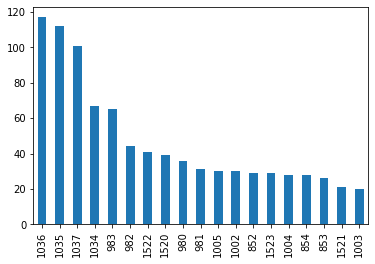

In [22]:
# Passar esta informação para um gráfico
df['LojaID'].value_counts(ascending=False).plot.bar()

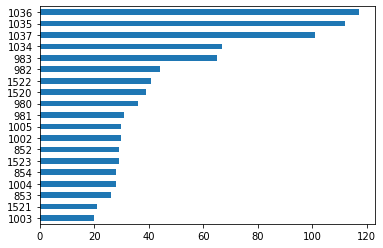

In [23]:
df['LojaID'].value_counts(ascending=True).plot.barh()

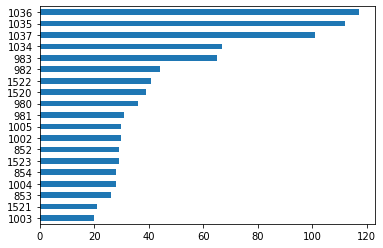

In [24]:
# Imprimir o grafico sem a linha <> no inicio
df['LojaID'].value_counts(ascending=True).plot.barh();

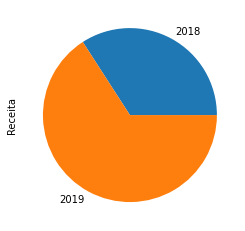

In [25]:
# Agrupar por data e imprimir um grafico de torta(pizza)
df.groupby(df['Data'].dt.year)["Receita"].sum().plot.pie();

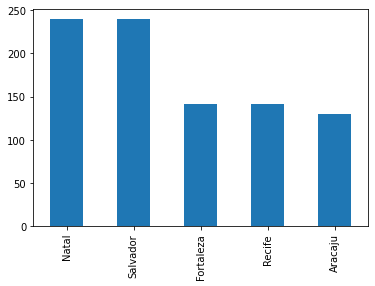

In [26]:

df['Cidade'].value_counts().plot.bar()

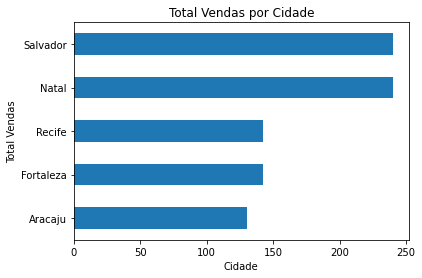

In [27]:
# Adicionando um título e alterando o nome dos eixos (X, Y)
import matplotlib.pyplot as plt
df["Cidade"].value_counts(ascending=True).plot.barh(title='Total Vendas por Cidade');
plt.xlabel('Cidade');
plt.ylabel('Total Vendas');

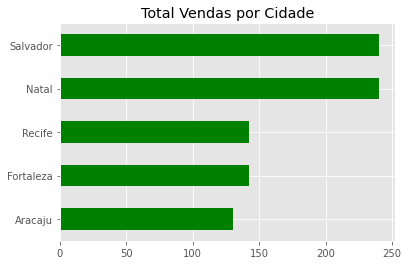

In [38]:
# Mudando a cor do gráfico
df['Cidade'].value_counts(ascending=True).plot.barh(title='Total Vendas por Cidade', color='Green')
plt.savefig('Grafico total de vendas por cidade.png')

In [30]:
# alterando o estilo
plt.style.use('ggplot')

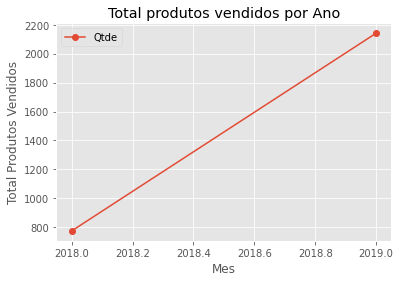

In [32]:
df.groupby(df['Ano_Venda'])['Qtde'].sum().plot(title= 'Total produtos vendidos por Ano', marker ="o")
plt.xlabel('Mes')
plt.ylabel('Total Produtos Vendidos')
plt.legend();

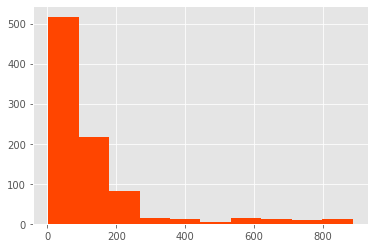

In [37]:
# Histograma
plt.hist(df['Valor_Venda'], color='orangered');